# Bagging: 
Bagging involves creating multiple independent decision trees by resampling the training dataset with replacement (bootstrap sampling) and training a separate decision tree on each sample. 
These trees are parallel and don't interact with each other.

# Random Forest: 
Random Forest, on the other hand, is a specific ensemble method that uses bagging as its base technique. 
In addition to bagging, it introduces randomness in the tree-building process by selecting a random subset of features at each node of the tree. This decorrelates the individual trees in the ensemble and makes the Random Forest more robust and accurate.

Let us see this node level feature sampling by actually plotting the decison tree esimator plots for both case.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,2.182061,1.562857,1.055546,2.882292,-3.132052,1
1,-0.984142,1.039270,0.456930,0.347099,-1.067564,1
2,2.816940,2.194388,-0.098322,2.995953,-2.293201,1
3,2.679191,1.276737,-1.722720,3.209564,-0.324379,1
4,1.307185,2.725103,-1.292878,2.457557,-0.681377,1


# Bagging

Making a bagging classifier with sampling of 2 features

In [4]:
bag = BaggingClassifier(max_features=2)

In [5]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=2)

Let us see the plot of the first decison tree estimator and see how many features it uses to split 

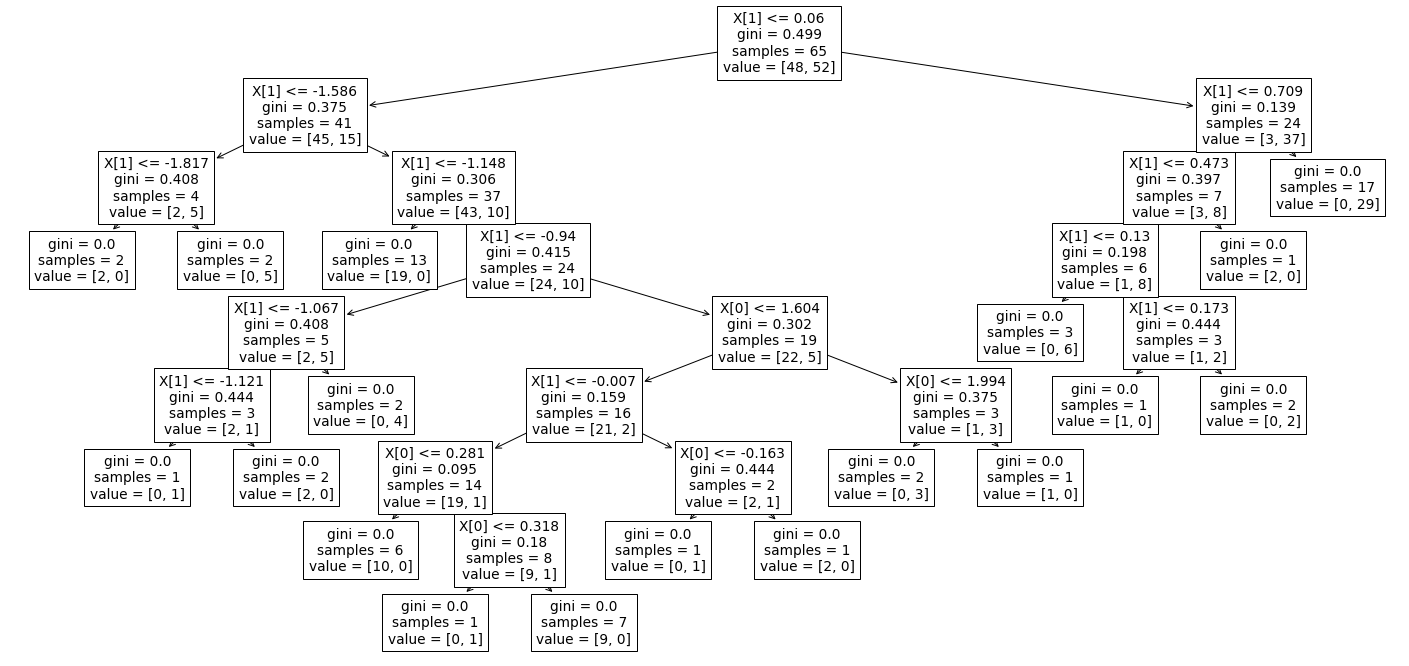

In [8]:
plt.figure(figsize=(25,12))
plot_tree(bag.estimators_[0])
plt.show()

Here, at every node the splitting is just by 2 features either 1 or 0.

# Random Forest

Making a Random Forest Classifier with maximum features as 2

In [9]:
rf = RandomForestClassifier(max_features=2)

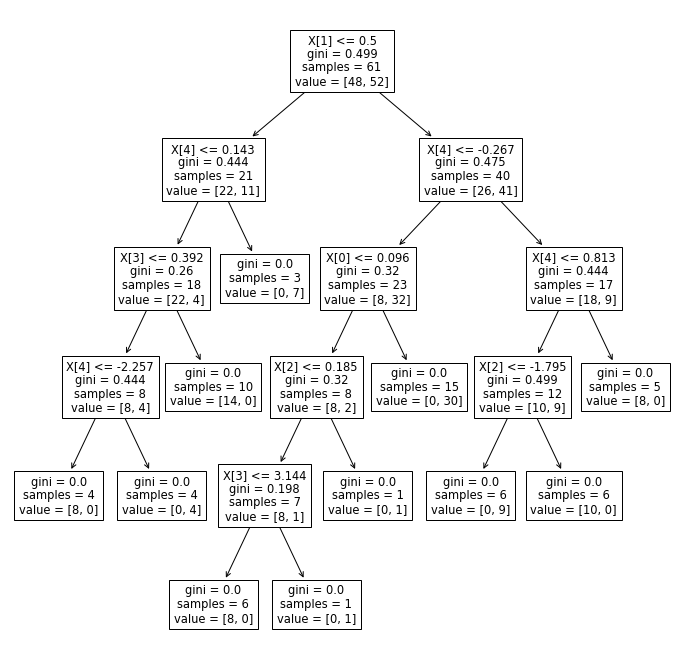

In [11]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[0])
plt.show()

Here, we can see at different nodes different features are being used

In summary, Random Forest is a more sophisticated ensemble method that builds on the bagging technique by introducing additional randomness in the tree-building process. This randomness and feature selection make Random Forest generally more robust and accurate compared to basic bagging when used for classification or regression tasks.